Predicting Insurance Premiums

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

In [45]:
df = pd.read_csv('train.csv')

In [46]:
df.sample(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
29843,29843,29.0,Female,38216.0,Married,2.0,Bachelor's,Employed,32.010959,Urban,...,0.0,11.0,847.0,6.0,2022-06-21 15:21:39.206847,Average,No,Rarely,Apartment,723.0
1153815,1153815,20.0,Female,15893.0,Divorced,0.0,PhD,NaN,38.822623,Suburban,...,NaN,8.0,NaN,8.0,2023-02-09 15:21:39.109552,Poor,No,Daily,Condo,1426.0
814705,814705,64.0,Female,14991.0,Divorced,1.0,PhD,Unemployed,36.120903,Urban,...,NaN,8.0,622.0,9.0,2022-07-05 15:21:39.236064,Average,Yes,Daily,House,661.0
50019,50019,39.0,Female,17663.0,Single,1.0,Bachelor's,Unemployed,16.270954,Rural,...,0.0,16.0,607.0,2.0,2019-12-10 15:21:39.093681,Average,No,Rarely,Condo,248.0
553714,553714,27.0,Male,16891.0,Divorced,4.0,PhD,Unemployed,21.494920,Suburban,...,NaN,14.0,576.0,7.0,2021-12-22 15:21:39.146733,Average,Yes,Daily,House,26.0
451529,451529,47.0,Female,5075.0,Divorced,1.0,PhD,NaN,37.366940,Urban,...,NaN,6.0,590.0,7.0,2023-11-06 15:21:39.207847,Poor,No,Weekly,Apartment,669.0
918947,918947,41.0,Female,21688.0,Single,3.0,PhD,NaN,29.663936,Rural,...,NaN,9.0,721.0,5.0,2023-03-29 15:21:39.202448,NaN,No,Rarely,Apartment,427.0
623497,623497,60.0,Female,47776.0,Divorced,1.0,PhD,NaN,12.908433,Rural,...,NaN,7.0,343.0,9.0,2022-03-05 15:21:39.102694,Average,No,Monthly,House,541.0
393211,393211,44.0,Male,5907.0,Single,1.0,High School,Unemployed,23.854378,Suburban,...,NaN,12.0,491.0,3.0,2021-12-05 15:21:39.246098,Good,No,Monthly,Apartment,3404.0
652790,652790,45.0,Male,25863.0,Single,4.0,Master's,Self-Employed,48.040415,Rural,...,0.0,7.0,NaN,9.0,2023-08-25 15:21:39.130190,NaN,No,Rarely,Apartment,446.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [48]:
df.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [49]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

In [50]:
cat_cols

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [51]:
for i in df[cat_cols]:
    print(df[i].value_counts())
    print(f" null values = {df[i].isnull().sum()}")
    per_null = df[i].isnull().sum() / len(df) * 100
    print(f" percentage of null values = {per_null:.2f}%")
    print()

Gender
Male      602571
Female    597429
Name: count, dtype: int64
 null values = 0
 percentage of null values = 0.00%

Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64
 null values = 18529
 percentage of null values = 1.54%

Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64
 null values = 0
 percentage of null values = 0.00%

Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64
 null values = 358075
 percentage of null values = 29.84%

Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64
 null values = 0
 percentage of null values = 0.00%

Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64
 null values = 0
 percentage of null values = 0.00%

Policy Start Date
2020-02-08 15:21:39.134960    142
2022-02-02 15:

In [52]:
num_cols

Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

In [53]:
(df[num_cols].isnull().sum() / len(df)) * 100

id                       0.000000
Age                      1.558750
Annual Income            3.745750
Number of Dependents     9.139333
Health Score             6.173000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Premium Amount           0.000000
dtype: float64

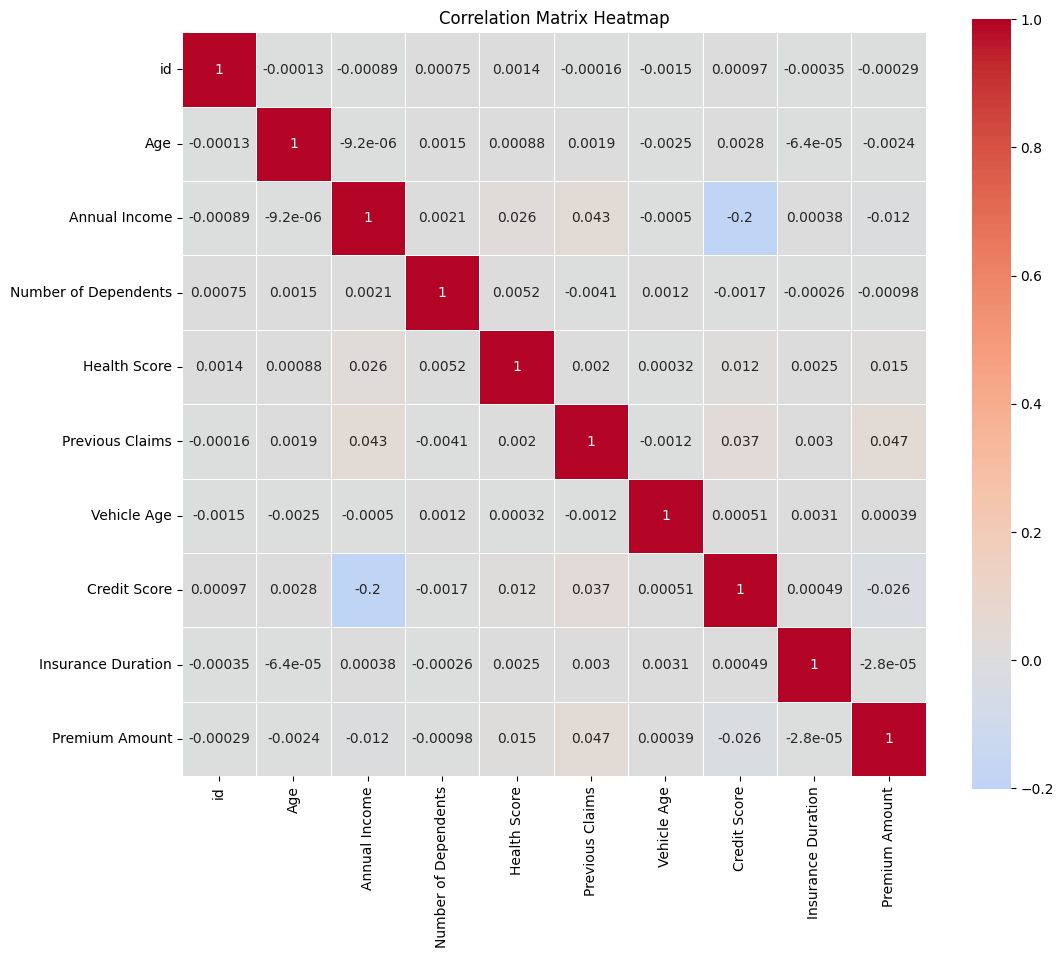

In [54]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [55]:
#drop insurance duration column
df.drop(columns=['Insurance Duration'], inplace=True)

In [56]:
from scipy.stats import skew
# Correcting num_cols to contain numerical column names
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Checking skewness for numerical columns
skewness = df[num_cols].skew()
print(skewness)

id                      0.000000
Age                    -0.012532
Annual Income           1.470357
Number of Dependents   -0.013255
Health Score            0.282187
Previous Claims         0.905321
Vehicle Age            -0.020409
Credit Score           -0.113573
Premium Amount          1.240915
dtype: float64


In [74]:
skew_cols = []
for col in num_cols:
    if df[col].skew() > 0.5 or df[col].skew() < -0.5:
        print(f"{col} is skewed with a skewness of {df[col].skew()}")
        skew_cols.append(col)
    else:
        print(f"{col} is not skewed ")

id is not skewed 
Age is not skewed 
Annual Income is not skewed 
Number of Dependents is not skewed 
Health Score is not skewed 
Previous Claims is not skewed 
Vehicle Age is not skewed 
Credit Score is not skewed 
Premium Amount is not skewed 


In [58]:
skew_cols

['Annual Income', 'Previous Claims', 'Premium Amount']

In [59]:
from scipy.stats import boxcox

In [73]:
for col in skew_cols:
    # Fill NaNs with mean before Box-Cox transformation
    df[col] = df[col].fillna(df[col].mean())
    # Ensure all values are positive for Box-Cox transformation
    if (df[col] <= 0).any():
        df[col] = df[col] + abs(df[col].min()) + 1

    df[col], _ = boxcox(df[col])
    if df[col].skew() > 0.5 or df[col].skew() < -0.5:
        print(f"{col} is skewed with a skewness of {df[col].skew()}")
    else:
        print(f"{col} is not skewed ")


Annual Income is not skewed 
Previous Claims is not skewed 
Premium Amount is not skewed 


In [71]:
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace = True)

C:\Users\iaman\AppData\Local\Temp\ipykernel_18288\3708670397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace = True)


In [69]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace = True)

C:\Users\iaman\AppData\Local\Temp\ipykernel_18288\1833504157.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)


In [72]:
df.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64